In [164]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

In [165]:
races = pd.read_csv("2024 Races.csv") # Kaggle data set 2024 data set
results = pd.read_csv("2024 Results.csv") # Kaggle data set 2024 data set
races.head()

,Race,Year,Date,Finishers
0,Houston Marathon,2024,2024-01-14,7180
1,Atlanta Marathon,2024,2024-02-24,1582
2,Disney World Marathon,2024,2024-01-03,12710
3,Carmel Marathon,2024,2024-04-13,1451
4,Jack and Jill Downhill Marathon,2024,2024-07-27,701


In [166]:
results.head()

,Name,Race,Year,Gender,Finish,Age Group
0,Zouhair Talbi,Houston Marathon,2024,Men,7599,25-29
1,Tsedat Ayana,Houston Marathon,2024,Men,7620,25-29
2,Hendrik Pfeiffer,Houston Marathon,2024,Men,7634,30-34
3,Pat Tiernan,Houston Marathon,2024,Men,7665,25-29
4,Hugo Edgardo Catrileo Tapia,Houston Marathon,2024,Men,7724,25-29


In [167]:
df_2 = pd.read_csv("UM_Races copy.csv", low_memory = False) #Kaggle data set between 1798 and 2022
df_2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [168]:
df_2.drop(columns = ["Athlete age category", "Athlete ID", "Athlete club"], inplace = True) # dropping unnecessary columns 
df_2["Athlete average speed"] = pd.to_numeric(df_2["Athlete average speed"], errors = "coerce")
df_2 = df_2[df_2["Athlete average speed"] < 44] # Data cont
df_2 = df_2[df_2["Athlete average speed"] > 1]
df_2

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,CHI,1978.0,M,10.286
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,CHI,1981.0,M,9.501
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,CHI,1987.0,M,9.472
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,ARG,1976.0,M,8.976
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,CHI,1992.0,M,8.469
...,...,...,...,...,...,...,...,...,...,...
6824323,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:22:54 h,AUS,1972.0,F,4.920
6824324,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:26:25 h,AUS,1970.0,M,4.895
6824325,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:26:26 h,AUS,1972.0,F,4.895
6824326,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:27:25 h,AUS,1975.0,F,4.888


In [169]:
##--- Running some checks---
# df_2["Event distance/length"].astype(str).str.contains("42km").value_counts()
#mask = df_2["Event distance/length"].astype(str).str.contains("50km")
#filtered = (df_2["Event distance/length"] == "42km").sum()
#filtered

mask1 = pd.to_numeric(df_2["Athlete average speed"], errors = 'coerce').isna()
df_2.loc[mask1, "Athlete average speed"] = pd.to_timedelta(df_2.loc[mask1, "Athlete average speed"]).dt.total_seconds()/3600
df_2["Athlete average speed"] = df_2["Athlete average speed"].astype(float)
df_2



,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,CHI,1978.0,M,10.286
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,CHI,1981.0,M,9.501
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,CHI,1987.0,M,9.472
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,ARG,1976.0,M,8.976
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,CHI,1992.0,M,8.469
...,...,...,...,...,...,...,...,...,...,...
6824323,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:22:54 h,AUS,1972.0,F,4.920
6824324,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:26:25 h,AUS,1970.0,M,4.895
6824325,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:26:26 h,AUS,1972.0,F,4.895
6824326,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:27:25 h,AUS,1975.0,F,4.888


### Finding Age & Creating Age Groups
#### array(['25-29', '30-34', '35-39', '40-44', '20-24', '45-49', '50-54', 'Under 20', '55-59', '60-64', '65-69', '70-74', '75-79','80 and Over']

In [170]:
# 2024 data contains age groups - easier to analyse - standardising the Ultra marathon age groups to this. 
df_2["Athlete age"] = (df_2["Year of event"] - df_2["Athlete year of birth"]).fillna(0).astype(int)
df_2["Age Group"] = df_2["Athlete age"].apply(lambda x : "25-29" if x >=25 and x <=29 else "30-34" if x >=30 and x <=34 else "35-39" if x>=35 and x<=39
                                              else "40-44" if x >=40 and x <= 44 else "20-24" if x >=20 and x<= 24 else "45-49" if x >=40 and x<=49
                                              else "50-54" if x>=50 and x<=54 else "Under 20" if x>0 and x<=20 else "55-59" if x>=55 and x<=59
                                              else "60-64" if x>=60 and x<=64 else "65-69" if x>=65 and x<=69 else "70-74" if x>=70 and x<=74
                                              else "75-79" if x>=75 and x<=79 else "80 and Over" if x>=80 else "Not available") 
df_2


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete age,Age Group
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,CHI,1978.0,M,10.286,40,40-44
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,CHI,1981.0,M,9.501,37,35-39
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,CHI,1987.0,M,9.472,31,30-34
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,ARG,1976.0,M,8.976,42,40-44
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,CHI,1992.0,M,8.469,26,25-29
...,...,...,...,...,...,...,...,...,...,...,...,...
6824323,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:22:54 h,AUS,1972.0,F,4.920,43,40-44
6824324,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:26:25 h,AUS,1970.0,M,4.895,45,45-49
6824325,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:26:26 h,AUS,1972.0,F,4.895,43,40-44
6824326,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:27:25 h,AUS,1975.0,F,4.888,40,40-44


In [171]:
#mask2 = pd.to_timedelta(df_2["Athlete performance"], errors = "coerce").isna()
#df_2.loc[mask2, "Athlete performance"] = pd.to_numeric(df_2.loc[mask2, "Athelte performance"].str.replace(r"[^\d.]", "", regex = True))
#df_2.loc[mask2, "Athlete performance"] = df_2.loc[mask2, "Athlete performance"] 

# for later - because the column Athlete performance has values in time and hour format because of the type of races
# do some visualizations first on this data and then convert all non time values to nan for futher analysis. 

In [172]:
results = results.drop_duplicates()
races = races.drop_duplicates()
races

,Race,Year,Date,Finishers
0,Houston Marathon,2024,2024-01-14,7180
1,Atlanta Marathon,2024,2024-02-24,1582
2,Disney World Marathon,2024,2024-01-03,12710
3,Carmel Marathon,2024,2024-04-13,1451
4,Jack and Jill Downhill Marathon,2024,2024-07-27,701
...,...,...,...,...
260,Seattle Marathon,2024,2024-12-01,2017
261,Ghost of Seattle Marathon,2024,2024-11-30,34
262,North Central Trail Marathon,2024,2024-11-30,274
263,Mobile Marathon,2024,2024-01-14,60


In [173]:
results["Age Group"].unique()

array(['25-29', '30-34', '35-39', '40-44', '20-24', '45-49', '50-54',
       'Under 20', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80 and Over'], dtype=object)

### Merging Race and Results df's


In [182]:
results = pd.merge(results, races, on = ["Race"]).copy()
results

,Name,Race,Year_x,Gender,Finish,Age Group,Year_y,Date_x,Finishers_x,Event distance/length,Year,Date_y,Finishers_y
0,Zouhair Talbi,Houston Marathon,2024,Men,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180
1,Tsedat Ayana,Houston Marathon,2024,Men,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180
2,Hendrik Pfeiffer,Houston Marathon,2024,Men,0.0,30-34,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180
3,Pat Tiernan,Houston Marathon,2024,Men,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180
4,Hugo Edgardo Catrileo Tapia,Houston Marathon,2024,Men,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487779,Mari Salcido,Miami Marathon,2024,Women,0.0,50-54,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677
487780,Vasilios Stayeas,Miami Marathon,2024,Men,0.0,75-79,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677
487781,Michael Weiss,Miami Marathon,2024,Men,0.0,30-34,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677
487782,Mark Larsen,Miami Marathon,2024,Men,0.0,30-34,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677


In [183]:
results.shape

(487784, 13)

### Adding the distance parameter to the results df

In [184]:
exceptions =['Alamo 13.1 fight to The Finish','Maine Coast Half Marathon & 5K','Demi Marathon Group Investors De Granby'] 
# removing half marathons and mixed marathons (since there are very few named)
# modifying the actual results df instead of creating a copy using .loc[:, "column name"]

results["Event distance/length"] = np.nan
results.loc[~ results["Race"].isin(exceptions), "Event distance/length"] = 42
results.loc[results["Race"] == "Super Marathon", "Event distance/length"] = 50
results = results[results["Event distance/length"].notna()]
# adding distances to the races - They are either 42km or 50km marathons

### Converting seconds to hours

In [185]:
print(results._is_copy)

None


In [186]:
results["Finish"] = results["Finish"].astype(float)
results["Finish"] = (results["Finish"] / 3600).round(3)


### Calculating Athlete Speed


In [188]:
results = results.assign(Athlete_Speed=(results["Event distance/length"] / results["Finish"]).round(2))
results

,Name,Race,Year_x,Gender,Finish,Age Group,Year_y,Date_x,Finishers_x,Event distance/length,Year,Date_y,Finishers_y,Athlete_Speed
0,Zouhair Talbi,Houston Marathon,2024,Men,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf
1,Tsedat Ayana,Houston Marathon,2024,Men,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf
2,Hendrik Pfeiffer,Houston Marathon,2024,Men,0.0,30-34,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf
3,Pat Tiernan,Houston Marathon,2024,Men,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf
4,Hugo Edgardo Catrileo Tapia,Houston Marathon,2024,Men,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487779,Mari Salcido,Miami Marathon,2024,Women,0.0,50-54,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf
487780,Vasilios Stayeas,Miami Marathon,2024,Men,0.0,75-79,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf
487781,Michael Weiss,Miami Marathon,2024,Men,0.0,30-34,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf
487782,Mark Larsen,Miami Marathon,2024,Men,0.0,30-34,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf


In [189]:
ageLabels = ['Under 20', '20-24', '25-29', '30-34', '35-39', 
             '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 and Over']
results["Age Group"] = pd.Categorical(results["Age Group"], categories=ageLabels, ordered = True) 
# setting age as categorical data to make it easier to plot

### Standardising Gender naming conventions

In [190]:
results.loc[:,"Gender"] = results.loc[:,"Gender"].apply(lambda x: "M" if x == "Men" else "W" if x == "Women" else "None")
results = results.rename(columns = {"Finish" : "Athlete performance"})
results

,Name,Race,Year_x,Gender,Athlete performance,Age Group,Year_y,Date_x,Finishers_x,Event distance/length,Year,Date_y,Finishers_y,Athlete_Speed
0,Zouhair Talbi,Houston Marathon,2024,M,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf
1,Tsedat Ayana,Houston Marathon,2024,M,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf
2,Hendrik Pfeiffer,Houston Marathon,2024,M,0.0,30-34,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf
3,Pat Tiernan,Houston Marathon,2024,M,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf
4,Hugo Edgardo Catrileo Tapia,Houston Marathon,2024,M,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487779,Mari Salcido,Miami Marathon,2024,W,0.0,50-54,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf
487780,Vasilios Stayeas,Miami Marathon,2024,M,0.0,75-79,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf
487781,Michael Weiss,Miami Marathon,2024,M,0.0,30-34,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf
487782,Mark Larsen,Miami Marathon,2024,M,0.0,30-34,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf


### Adding the country code

In [191]:
country_map = marathon_countries = {
    "Berlin Marathon": "GER",
    "Toronto Waterfront Marathon": "CAN",
    "Mississauga Marathon": "CAN",
    "Hamilton Marathon": "CAN",
    "Vancouver Marathon": "CAN",
    "Marathon du P'tit Train du Nord": "CAN",
    "Marathon SSQ de Longueuil": "CAN",
    "Edmonton Marathon": "CAN"
}
results["Athlete country"] = results["Race"].map(marathon_countries).fillna("USA")
results

,Name,Race,Year_x,Gender,Athlete performance,Age Group,Year_y,Date_x,Finishers_x,Event distance/length,Year,Date_y,Finishers_y,Athlete_Speed,Athlete country
0,Zouhair Talbi,Houston Marathon,2024,M,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf,USA
1,Tsedat Ayana,Houston Marathon,2024,M,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf,USA
2,Hendrik Pfeiffer,Houston Marathon,2024,M,0.0,30-34,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf,USA
3,Pat Tiernan,Houston Marathon,2024,M,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf,USA
4,Hugo Edgardo Catrileo Tapia,Houston Marathon,2024,M,0.0,25-29,2024,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487779,Mari Salcido,Miami Marathon,2024,W,0.0,50-54,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf,USA
487780,Vasilios Stayeas,Miami Marathon,2024,M,0.0,75-79,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf,USA
487781,Michael Weiss,Miami Marathon,2024,M,0.0,30-34,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf,USA
487782,Mark Larsen,Miami Marathon,2024,M,0.0,30-34,2024,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf,USA


## Concatenating the Ultra marathon and the marathon data set. 

In [192]:
mapping_columns = {"Race" : "Event name", 
                   "Year_x": "Year of event", 
                   "Gender" : "Athlete gender", 
                   "Athlete performance": "Athlete performance", 
                   "Age Group": "Age Group" , 
                   "Date": "Event dates", 
                   "Finishers": "Event number of finishers", 
                   "Event distance/length": "Event distance/length", 
                   "Athlete Speed": "Athlete average speed", 
                   "Athlete country": "Athlete country"}
                   

In [193]:
results.drop(columns = ["Name","Year_y"], inplace = True) # Dropping unnecessary columns
results

,Race,Year_x,Gender,Athlete performance,Age Group,Date_x,Finishers_x,Event distance/length,Year,Date_y,Finishers_y,Athlete_Speed,Athlete country
0,Houston Marathon,2024,M,0.0,25-29,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf,USA
1,Houston Marathon,2024,M,0.0,25-29,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf,USA
2,Houston Marathon,2024,M,0.0,30-34,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf,USA
3,Houston Marathon,2024,M,0.0,25-29,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf,USA
4,Houston Marathon,2024,M,0.0,25-29,2024-01-14,7180,42.0,2024,2024-01-14,7180,inf,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487779,Miami Marathon,2024,W,0.0,50-54,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf,USA
487780,Miami Marathon,2024,M,0.0,75-79,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf,USA
487781,Miami Marathon,2024,M,0.0,30-34,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf,USA
487782,Miami Marathon,2024,M,0.0,30-34,2024-01-28,2677,42.0,2024,2024-01-28,2677,inf,USA


In [194]:
results = results.rename(columns = mapping_columns)
full_df = pd.concat([results, df_2], axis = 0) 
full_df.drop(columns = ["Athlete year of birth", "Athlete age"], inplace = True)
full_df

,Event name,Year of event,Athlete gender,Athlete performance,Age Group,Date_x,Finishers_x,Event distance/length,Year,Date_y,Finishers_y,Athlete_Speed,Athlete country,Event dates,Event number of finishers,Athlete average speed
0,Houston Marathon,2024,M,0.0,25-29,2024-01-14,7180.0,42.0,2024.0,2024-01-14,7180.0,inf,USA,NaN,NaN,NaN
1,Houston Marathon,2024,M,0.0,25-29,2024-01-14,7180.0,42.0,2024.0,2024-01-14,7180.0,inf,USA,NaN,NaN,NaN
2,Houston Marathon,2024,M,0.0,30-34,2024-01-14,7180.0,42.0,2024.0,2024-01-14,7180.0,inf,USA,NaN,NaN,NaN
3,Houston Marathon,2024,M,0.0,25-29,2024-01-14,7180.0,42.0,2024.0,2024-01-14,7180.0,inf,USA,NaN,NaN,NaN
4,Houston Marathon,2024,M,0.0,25-29,2024-01-14,7180.0,42.0,2024.0,2024-01-14,7180.0,inf,USA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6824323,Yurrebilla Trail 56km Ultra (AUS),2015,F,11:22:54 h,40-44,NaN,NaN,56km,NaN,NaN,NaN,NaN,AUS,08.10.2015,401.0,4.920
6824324,Yurrebilla Trail 56km Ultra (AUS),2015,M,11:26:25 h,45-49,NaN,NaN,56km,NaN,NaN,NaN,NaN,AUS,08.10.2015,401.0,4.895
6824325,Yurrebilla Trail 56km Ultra (AUS),2015,F,11:26:26 h,40-44,NaN,NaN,56km,NaN,NaN,NaN,NaN,AUS,08.10.2015,401.0,4.895
6824326,Yurrebilla Trail 56km Ultra (AUS),2015,F,11:27:25 h,40-44,NaN,NaN,56km,NaN,NaN,NaN,NaN,AUS,08.10.2015,401.0,4.888


# Analysing the FULL DF!

# Representation of countries over the years

In [195]:
## Filtering top 5 countries 

temp_df = full_df["Athlete country"].value_counts()
top5 = temp_df.sort_values(ascending = False).head(5)
top5 = pd.concat([top5, pd.Series([temp_df["IND"]], index = ["IND"])]) # adding India to check where Ind stands
top5 = top5.reset_index()
top5.columns = ["Athlete country", "count"]
df_top5 = full_df[full_df["Athlete country"].isin(top5["Athlete country"])] # creating data set that only contains the top 5 countries
run5 = df_top5.groupby(["Athlete country", "Year of event"]).size().reset_index(name = "Number of finishers") # Finding the number of people who completed for each year and grouped by each country
years = [2000, 2005, 2010, 2015, 2020, 2024] # limiting the number of years for better plotting
run5 = run5[run5["Year of event"].isin(years)] #Filtering the data set to contain only the above mentioned years
run5 = run5[run5["Number of finishers"] <450000] # USA has more than 450k finishers - skewing the chart, limiting it for a better visual
#hunder = full_df[full_df["Event distance/length"] == "100km"]
#hunder
#run5



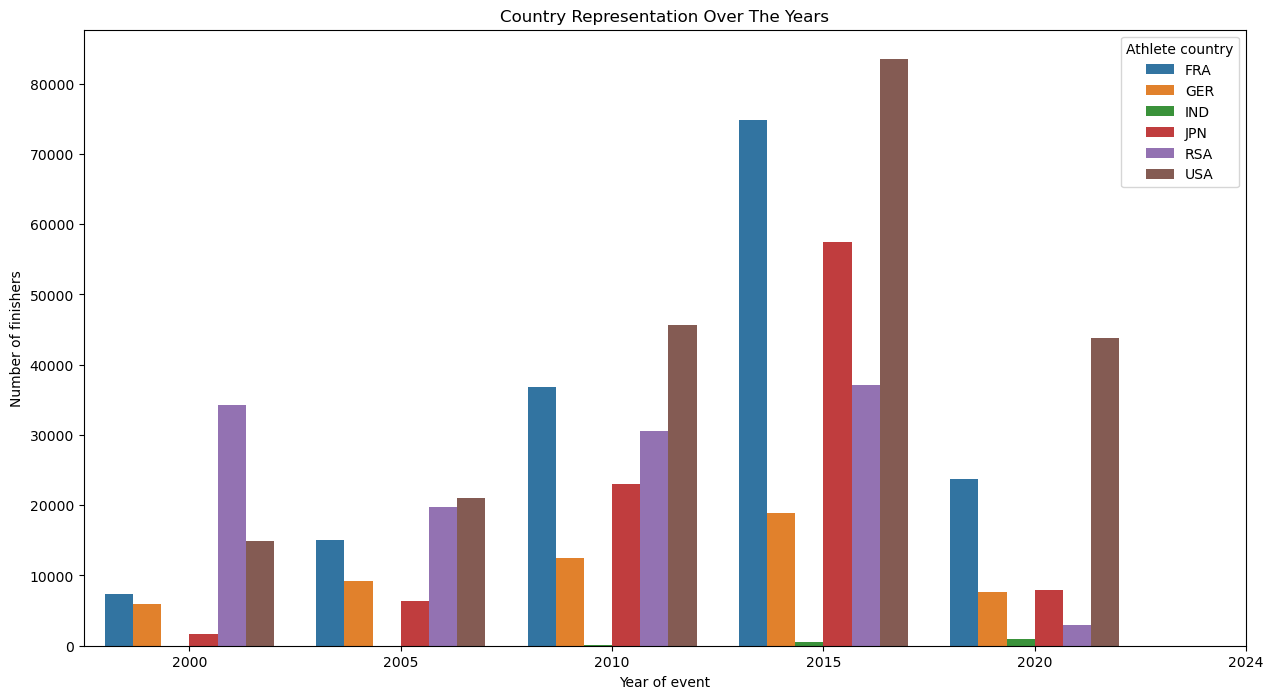

In [196]:
plt.figure(figsize = (15,8))
sns.barplot(data = run5, x = "Year of event", y = "Number of finishers", hue = "Athlete country")
years = [2000, 2005, 2010, 2015, 2020, 2024]
plt.title("Country Representation Over The Years")
plt.xticks(range(len(years)), years)
plt.show()

# Gender Participation over the years

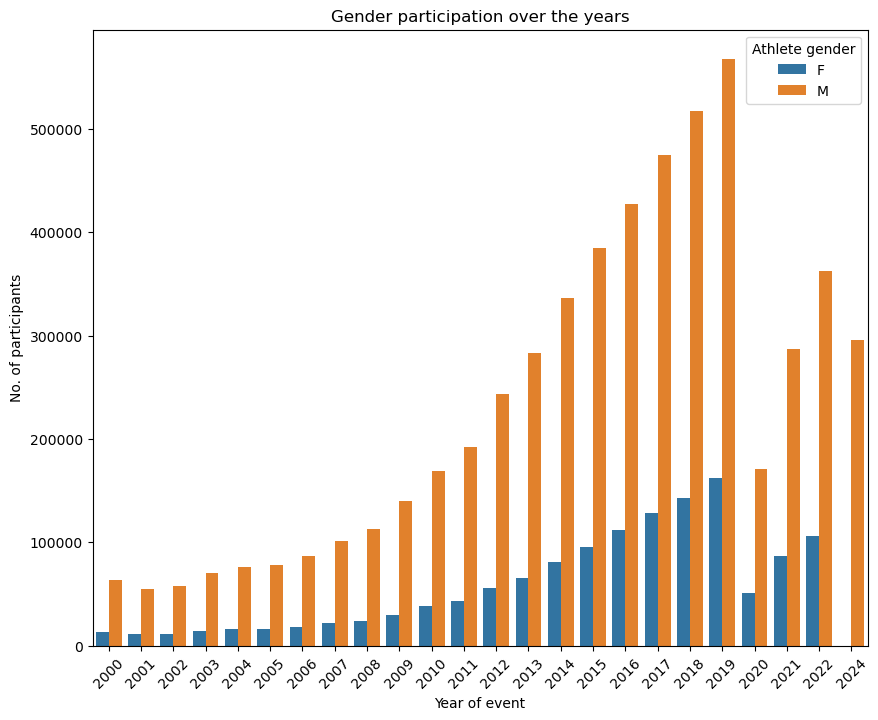

In [197]:
full_df = full_df[full_df["Athlete gender"].isin(["M", "F"])] # Other data is very minimal
gender_years = full_df.groupby(["Athlete gender" , "Year of event"]).size().reset_index(name = "No. of participants")
gender_years_fil = gender_years[gender_years["Year of event"] > 1999]
gender_years_fil
plt.figure(figsize = (10,8))
sns.barplot(gender_years_fil, x = gender_years_fil["Year of event"], y = gender_years_fil["No. of participants"], hue = "Athlete gender")
plt.title("Gender participation over the years")
plt.xticks(rotation = 45)
plt.show()

# Seasonal Participation

In [199]:
# Winter = 12 - 2
# Spring = 3 - 5
# Summer = 6 - 8 
# Fall = 9 - 11
full_df.loc[:,"Event dates"] = pd.to_datetime(full_df["Event dates"], format = "mixed", errors = "coerce")
full_df.loc[:,"Seasons"] = full_df["Event dates"].dt.month.apply(lambda x: "Winter" if x > 11 and x <=2 else "Spring" if x > 2 and x <=5 else 
  
                                                 "Summer" if x > 5 and x <= 8 else "Fall" if x > 8 and x <=11 else "Winter")
seasonal_full = full_df["Seasons"].value_counts()
seasonal_full

Seasons
Winter    2716202
Spring    1687872
Summer    1387096
Fall      1315222
Name: count, dtype: int64

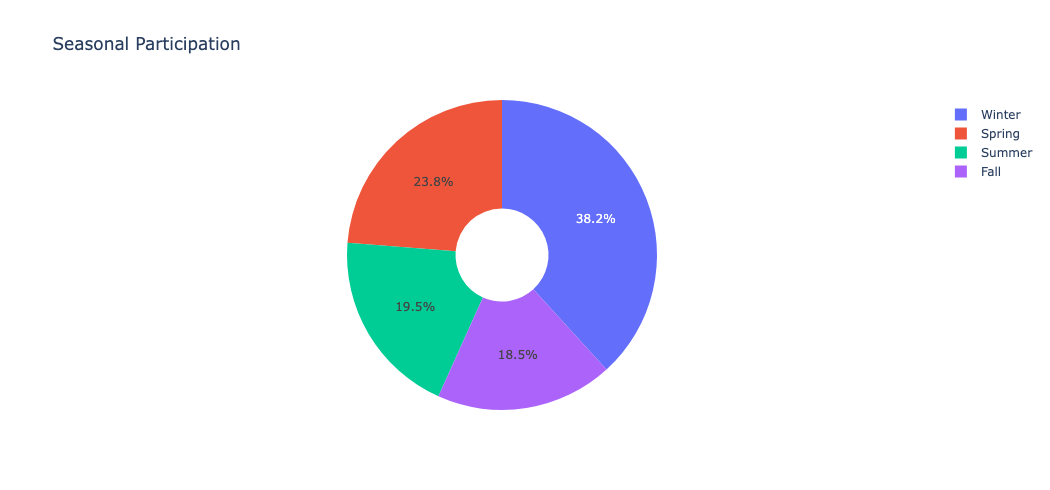

In [200]:
# Since plotly is more interactive using px rather than matplot
px.pie(seasonal_full , names = seasonal_full.index, values = seasonal_full.values, title = "Seasonal Participation", hole = .3, width = 490, height = 490)


# Athelte Performance Metrics

In [201]:
mask = full_df["Event distance/length"].str.match(r"^\d+\.?\d*(km)?$", case = False, na = False)
full_df = full_df[mask]
#  I am ignoring the marathons that are done based on time like 12hours & only keeping distance based ones
full_df["Event distance numeric"] = full_df["Event distance/length"].str.extract(r"(\d+)")
# Extracting just the number part from data like 42.0, 50km etc
full_df["Event distance numeric"] = pd.to_numeric(full_df["Event distance numeric"])
# Converting all of it to numeric format


# Does the average running speed for male and female athletes differ significantly, across all race distances?

In [202]:
male_df = full_df[full_df["Athlete gender"] == "M"]["Athlete average speed"]
female_df = full_df[full_df["Athlete gender"] == "F"]["Athlete average speed"]
#sns.histplot(male_df.dropna(), bins= 300 , kde = False, color = "blue") 
#plt.show()
#male_df.shape(6331324,)



In [203]:
full_df = full_df.rename(columns = {"Athlete average speed" : "Athlete_average_speed", "Athlete gender": "Gender", "Event distance numeric": "Distance"})
model = smf.ols("Athlete_average_speed ~ C(Gender) * Distance", data = full_df).fit()
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Athlete_average_speed   R-squared:                       0.063
Model:                               OLS   Adj. R-squared:                  0.063
Method:                    Least Squares   F-statistic:                 1.239e+05
Date:                   Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                           20:52:31   Log-Likelihood:            -1.1943e+07
No. Observations:                5524081   AIC:                         2.389e+07
Df Residuals:                    5524077   BIC:                         2.389e+07
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

#### The above analysis shows that the significance is strong and as the distance goes up, both male and female athlete's speed decreases but male speed decreases slightly more than women over longer distances. 
#### The R squared value is just 6.3 % hence inferring that gender and distance explains only 6.3 % of the factors influencing speed but not ALL the factors - confirmed also by the P values which show that gender and distance play a signifiant role in influencing the speed


# Visualising the above relationship distance and speed when compared with gender

Text(0.5, 1.0, 'Distributions of Athlete average speed')

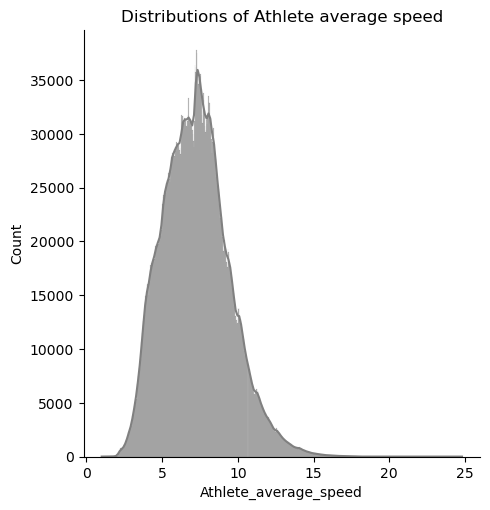

In [134]:
sns.displot(data=full_df,x='Athlete_average_speed',color='grey',kde=True)
plt.title("Distributions of Athlete average speed")

#### The above density plot with KDE set to true (Kernel Density Estimation) shows that most athletes are centered around the 5-10 average speed. 

#### It is right skewed, showing that there are very few high performance (high speed) athletes 

#### There are few very slow (speed lower that 5) athletes


In [131]:
full_df["Distance"].unique()
bins = [0, 50, 100, 200, 500, 1000, np.inf] #np.inf catches all values above 1000 - more cleaner
labels = ['0-50', '50-100', '100-200', '200-500', '500-1000', '1000+']
full_df["Distance Category"] = pd.cut(full_df["Distance"], bins = bins, labels = labels, right = False) # right = False excluding the upper limit of each bin, eg: 0 - 50 but not including 50, 50-100 (50 is included but 100 is not
full_df["Gender"].unique()
# Creating categories since there are too many individual ones. Categories make it easier for visualisation

array(['M', 'F'], dtype=object)

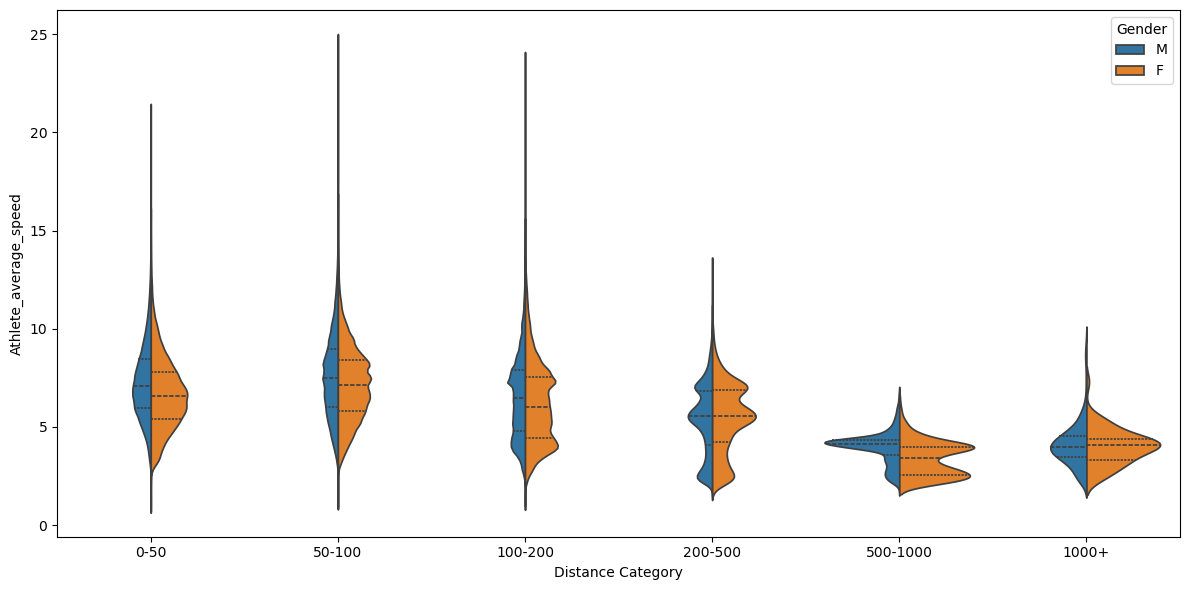

In [132]:
plt.figure(figsize=(12, 6))
sns.violinplot(x = 'Distance Category', y='Athlete_average_speed', hue = 'Gender', data = full_df, split = True, inner='quartz')
plt.tight_layout()

#### the violin plot above also shows the quartiles, as the distance increases, the quartiles become closer indicating that the 
#### athletes typically run at similar speeds ( for 1000 + Q1 around 4.5 and Q3 around 6.5 but for 0-50, Q1 around 5, Q3 around 8 ;Variation is more in 0-50)

####  The 200-500km category shows multiple peaks, showing that there are clusters of athletes performing at different speed levels - likely representing different training backgrounds, different marathon strategies etc. As distance increases beyond 500m, distributions become tighter with fewer peaks. These are endurance races showing that endurance athletes may have similar strategies to achieve maximum performance

#### This also confirms the OLS regression results where the 1000+ violin plot shows the median speed quartile for females is slightly higher than the male quartile

# How does age affect speed?

In [140]:
age_speed=full_df.groupby(['Age Group'])['Athlete_average_speed'].agg(['mean','count']).sort_values(by='mean',ascending=False)
age_speed

,mean,count
Age Group,,
20-24,7.491978,97095
30-34,7.447055,650931
25-29,7.417060,342384
35-39,7.415007,900217
40-44,7.336779,1009078
45-49,7.234911,886751
50-54,7.166287,618518
55-59,7.070695,339989
Under 20,6.983723,10719


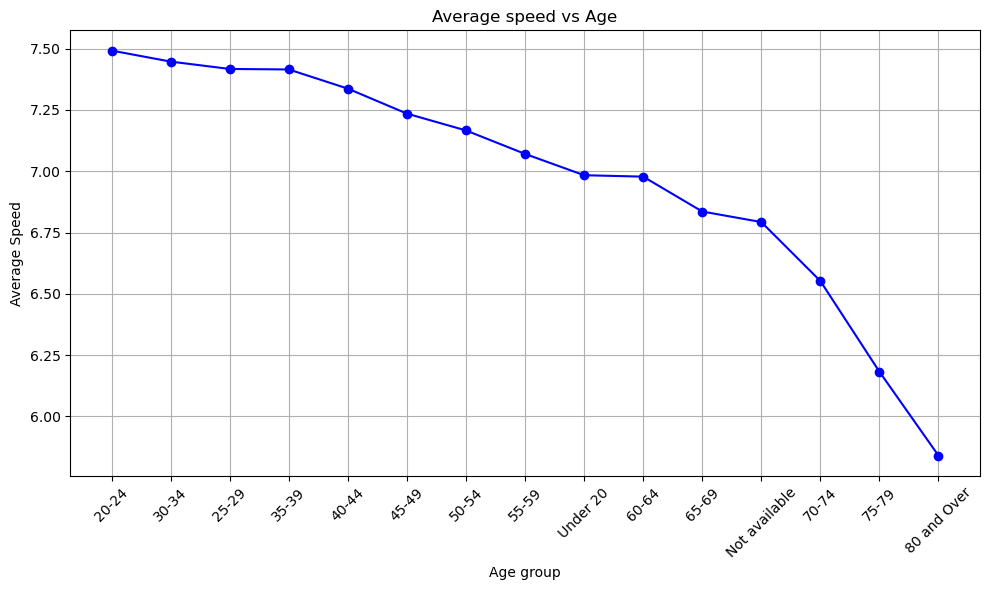

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(age_speed.index, age_speed['mean'], marker='o', color='b', linestyle='-')
plt.xlabel('Age group')
plt.ylabel('Average Speed')
plt.title('Average speed vs Age')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()